## Business Problem
The business or research problem I am trying to solve is finding out which attributes are the strongest predictors
of whether or not a credit card application is approved.

## Data Preparation

In [1]:
# Loading dataset
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',header=None)

In [4]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
df.tail()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [3]:
# Giving attributes working names to help understand the data even though the actual attribute names aren't given
# Assigning 15 attribute names and target variable name in 16th column

df.columns = ['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 
             'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved']

df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
# Determining how many missing values exist
df[df.eq('?').any(axis=1)]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


In [9]:
df.iloc[592,:] # Specific row with many missing values

Male                  b
Age               23.17
Debt                0.0
Married               ?
BankCustomer          ?
EducationLevel        ?
Ethnicity             ?
YearsEmployed       0.0
PriorDefault          f
Employed              f
CreditScore           0
DriversLicense        f
Citizen               p
ZipCode               ?
Income                0
Approved              +
Name: 592, dtype: object

In [10]:
# Making missing values be None
df_null = df.replace('?',None)
df_null.iloc[592,:]

Male                  b
Age               23.17
Debt                0.0
Married            None
BankCustomer       None
EducationLevel     None
Ethnicity          None
YearsEmployed       0.0
PriorDefault          f
Employed              f
CreditScore           0
DriversLicense        f
Citizen               p
ZipCode            None
Income                0
Approved              +
Name: 592, dtype: object

In [11]:
# Now that missing values are 'None', I can use isnull method
df_null.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

## Working with new dataframe with null values

In [12]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            678 non-null    object 
 1   Age             678 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [13]:
df_null.mean(axis=0)

/tmp/ipykernel_184/2520973149.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_null.mean(axis=0)


Debt                4.758725
YearsEmployed       2.223406
CreditScore         2.400000
Income           1017.385507
dtype: float64

In [14]:
df_null['Income'].mean()

1017.3855072463768

In [19]:
# Using value_counts() (returns count of all unique values) method
df['ZipCode'].value_counts()

00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00021      1
00393      1
00395      1
00093      1
00256      1
Name: ZipCode, Length: 171, dtype: int64

In [20]:
# Using unique() (takes 1-D array and returns unique values) and nunique() (returns number) methods
df['ZipCode'].unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', '?', '00980', '00443', '00140', '00094',
       '00368', '00288', '00928', '00188', '00112', '00171', '00268',
       '00167', '00075', '00152', '00176', '00329', '00212', '00410',
       '00274', '00375', '00408', '00350', '00204', '00040', '00181',
       '00399', '00440', '00093', '00060', '00395', '00393', '00021',
       '00029', '00102', '00431', '00370', '00024', '00020', '00129',
       '00510', '00195', '00144', '00380', '00049', '00050', '00381',
       '00150', '00117', '00056', '00211', '00230', '00156', '00022',
       '00228', '00519', '00253', '00487', '00220', '00088', '00073',
       '00121',

In [21]:
df['ZipCode'].nunique()

171

In [ ]:
# Replacing 'None' values

# Data Visualization

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

Male


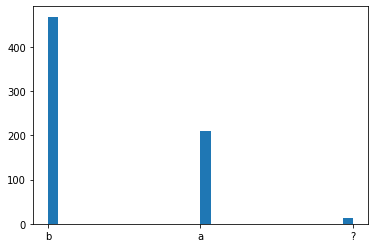

Age


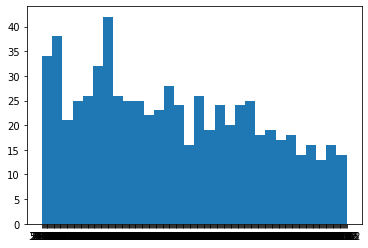

Debt


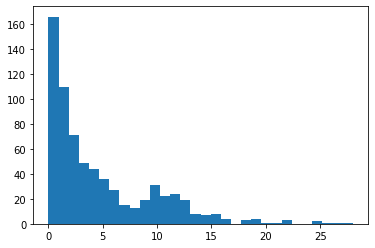

Married


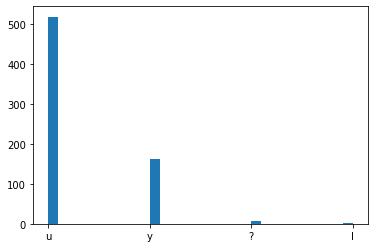

BankCustomer


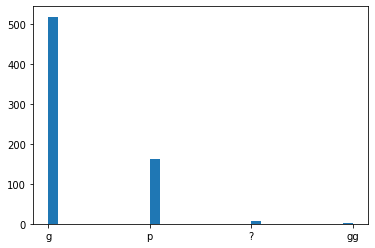

EducationLevel


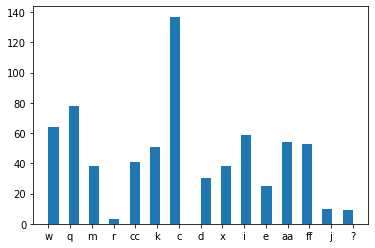

Ethnicity


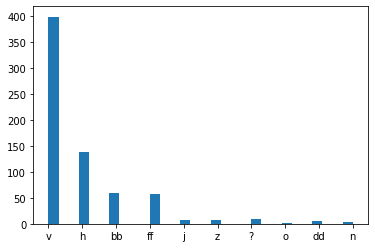

YearsEmployed


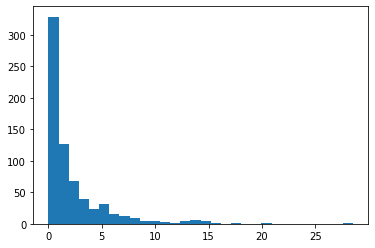

PriorDefault


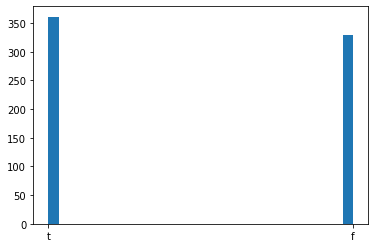

Employed


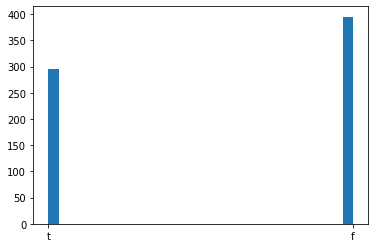

CreditScore


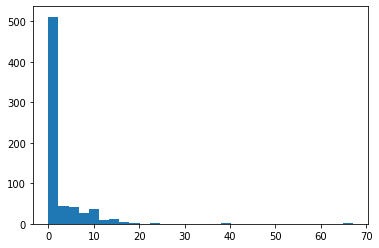

DriversLicense


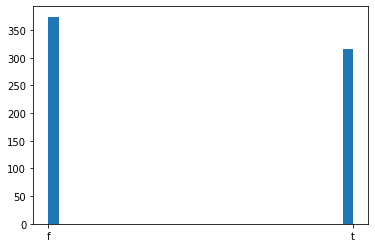

Citizen


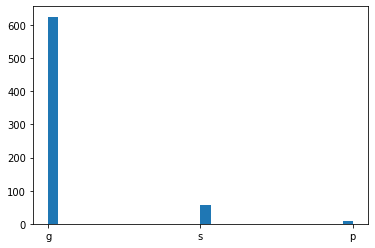

ZipCode


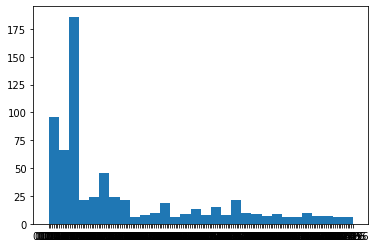

Income


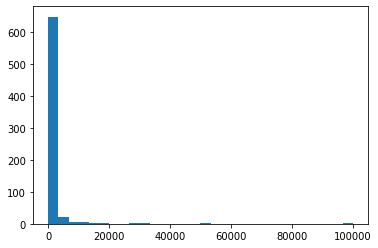

Approved


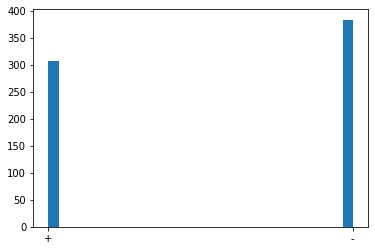

In [21]:
# Making Histograms for each feature
for col in df.columns:
    print(col)
    plt.hist(df[col],bins=30)
    plt.show()

Male


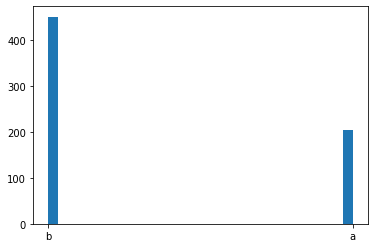

Age


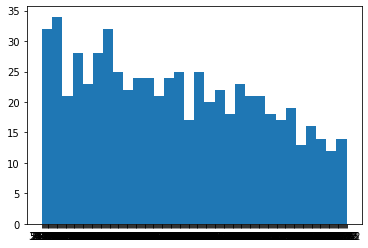

Debt


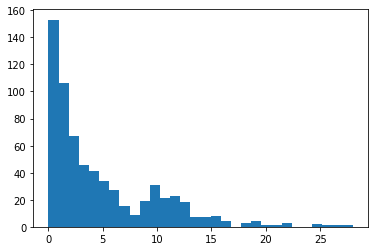

Married


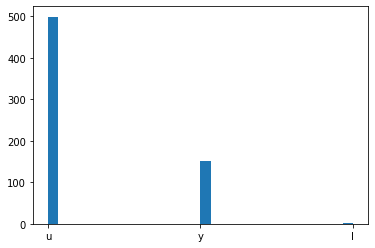

BankCustomer


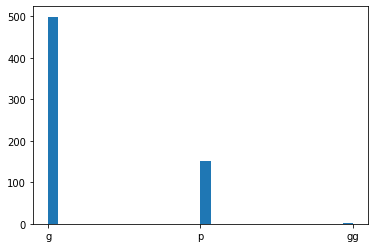

EducationLevel


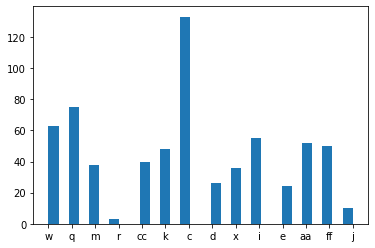

Ethnicity


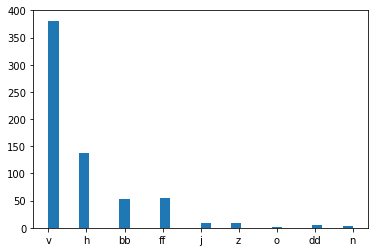

YearsEmployed


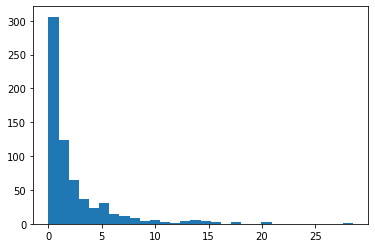

PriorDefault


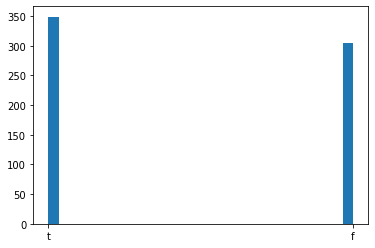

Employed


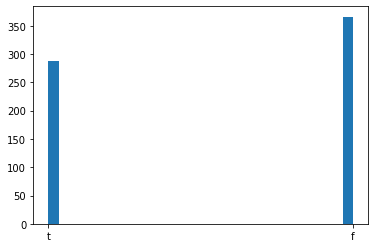

CreditScore


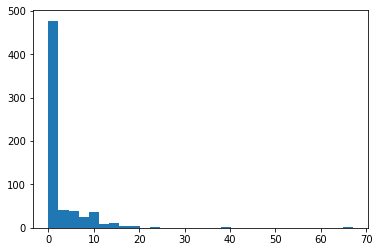

DriversLicense


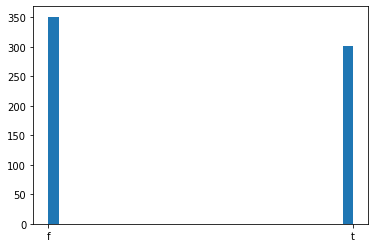

Citizen


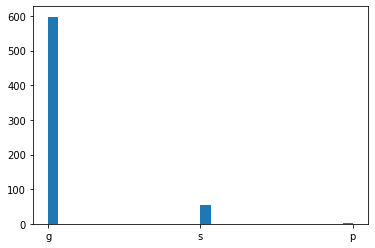

ZipCode


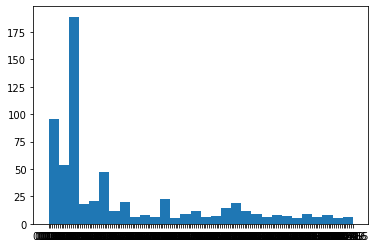

Income


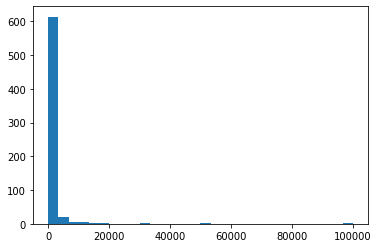

Approved


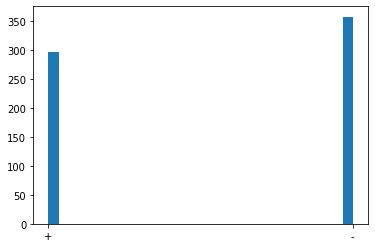

In [58]:
# Data Visualization w/o None values (653 observations (690-37=653))
no_none = df_null[~df_null.isnull().any(axis=1)]

# Histograms w/o None values
for col in no_none.columns:
    print(col)
    plt.hist(no_none[col],bins=30)
    plt.show()

In [117]:
# 'Age' feature boxplot
#plt.boxplot(no_none['Age'])
no_none['YearsEmployed'].mean()

2.244295558958652

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa8f7cfc250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa8f7cfc8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa8f7cf5f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8f7cfcc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8f7cfcf40>],
 'means': []}

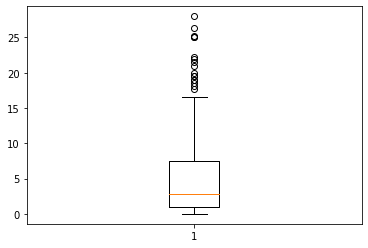

In [97]:
# 'Debt' feature boxplot
plt.boxplot(no_none['Debt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa8f7b6a340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa8f7b6a7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa8f7b6a070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8f7b6ad60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8f7b79070>],
 'means': []}

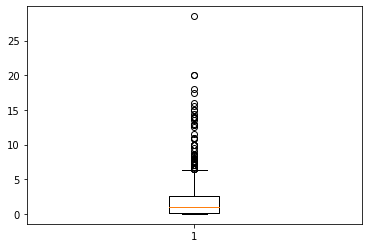

In [127]:
# 'YearsEmployed' feature boxplot
plt.boxplot(no_none['YearsEmployed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa8f7a5c2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa8f7a5c880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa8f7aa8fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8f7a5cd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8f7a5cfd0>],
 'means': []}

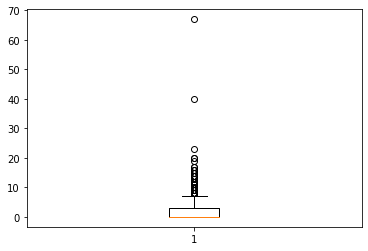

In [129]:
# 'CreditScore' feature boxplot
plt.boxplot(no_none['CreditScore'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa8f79ac0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa8f79ac640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa8f79a0d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa8f79acbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa8f79aceb0>],
 'means': []}

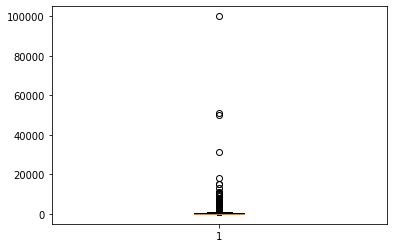

In [142]:
# 'Income' feature boxplot
plt.boxplot(no_none['Income'])

In [98]:
no_none.describe()

,Debt,YearsEmployed,CreditScore,Income
count,653.000000,653.000000,653.000000,653.000000
mean,4.829533,2.244296,2.502297,1013.761103
std,5.027077,3.371120,4.968497,5253.278504
min,0.000000,0.000000,0.000000,0.000000
25%,1.040000,0.165000,0.000000,0.000000
50%,2.835000,1.000000,0.000000,5.000000
75%,7.500000,2.625000,3.000000,400.000000
max,28.000000,28.500000,67.000000,100000.000000


In [62]:
no_none.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            653 non-null    object 
 1   Age             653 non-null    object 
 2   Debt            653 non-null    float64
 3   Married         653 non-null    object 
 4   BankCustomer    653 non-null    object 
 5   EducationLevel  653 non-null    object 
 6   Ethnicity       653 non-null    object 
 7   YearsEmployed   653 non-null    float64
 8   PriorDefault    653 non-null    object 
 9   Employed        653 non-null    object 
 10  CreditScore     653 non-null    int64  
 11  DriversLicense  653 non-null    object 
 12  Citizen         653 non-null    object 
 13  ZipCode         653 non-null    object 
 14  Income          653 non-null    int64  
 15  Approved        653 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.7+ KB


In [86]:
type(no_none['Age'][0]) # for some reason 'Age' variable/feature is classified as str even though it's numerical # ZipCode too

str

In [82]:
df['Age'][0]

'30.83'

## More Data Preparation
1. Fixing 'Age' variable to be numerical 
1. Handling None Values
1. Seaborn visualization

In [32]:
# Converting 'Age' variable to float ('ZipCode' will stay as string to be categorical (unsure if it'll be difficult to use))
df_null['Age'] = df_null['Age'].astype('float')

In [53]:
df_null.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [55]:
df_null['Age'].median()

28.46

(array([ 96., 209., 135.,  99.,  53.,  43.,  25.,   9.,   6.,   3.]),
 array([13.75, 20.4 , 27.05, 33.7 , 40.35, 47.  , 53.65, 60.3 , 66.95,
        73.6 , 80.25]),
 <BarContainer object of 10 artists>)

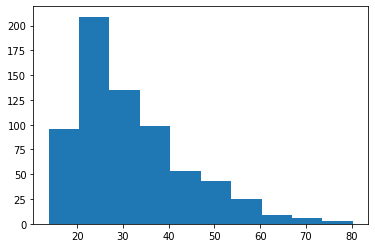

In [62]:
# Histogram of 'Age' variable
plt.hist(df_null['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f84537ea5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f84537eab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f84537ea2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f84537f8130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f84537f8400>],
 'means': []}

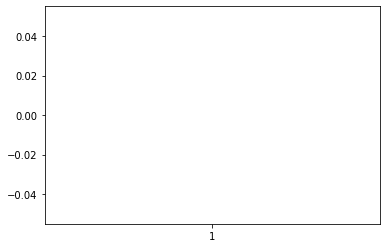

In [63]:
# Boxplot of 'Age' variable
plt.boxplot(df_null['Age'])

In [ ]:
# new_df Boxplots

Age


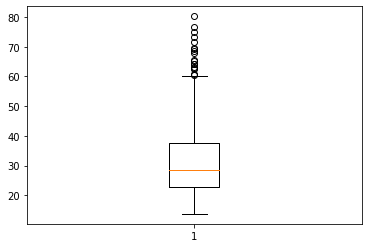

In [135]:
print('Age')
plt.boxplot(new_df['Age'])
plt.show()

Debt


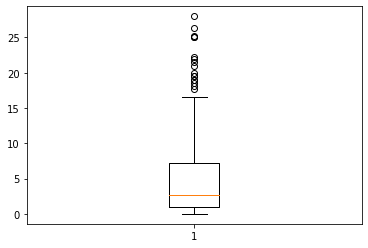

In [136]:
print('Debt')
plt.boxplot(new_df['Debt'])
plt.show()

YearsEmployed


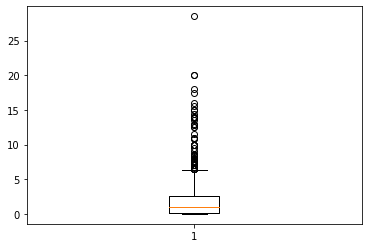

In [137]:
print('YearsEmployed')
plt.boxplot(new_df['YearsEmployed'])
plt.show()

CreditScore


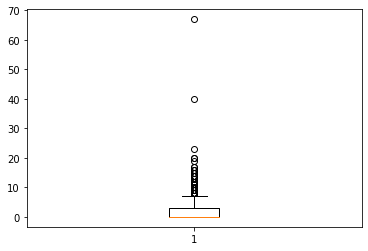

In [138]:
print('CreditScore')
plt.boxplot(new_df['CreditScore'])
plt.show()

Income


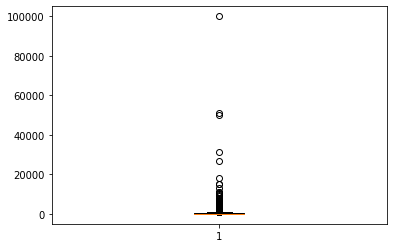

In [139]:
print('Income')
plt.boxplot(new_df['Income'])
plt.show()

In [49]:
df_null.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [82]:
# Changing null values
new_df = df_null

True

In [83]:
# 'Male' feature
new_df['Male'] = new_df['Male'].fillna('b')

In [85]:
new_df['Age'].median()

28.46

In [86]:
# 'Age' feature
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].median())

In [97]:
# 'Married' feature
new_df['Married'] = new_df['Married'].fillna('u')

In [102]:
# 'BankCustomer' feature
new_df['BankCustomer'] = new_df['BankCustomer'].fillna('g')

In [107]:
# 'EducationLevel' feature
new_df['EducationLevel'] = new_df['EducationLevel'].fillna('c')

In [112]:
# 'Ethnicity' feature
new_df['Ethnicity'] = new_df['Ethnicity'].fillna('v')

In [120]:
# 'ZipCode' feature
new_df['ZipCode'] = new_df['ZipCode'].fillna('00000')

In [121]:
new_df.iloc[206]

Male                  a
Age               71.58
Debt                0.0
Married               u
BankCustomer          g
EducationLevel        c
Ethnicity             v
YearsEmployed       0.0
PriorDefault          f
Employed              f
CreditScore           0
DriversLicense        f
Citizen               p
ZipCode           00000
Income                0
Approved              +
Name: 206, dtype: object

In [122]:
new_df.isnull().sum() # No None values left

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [130]:
new_df.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [131]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


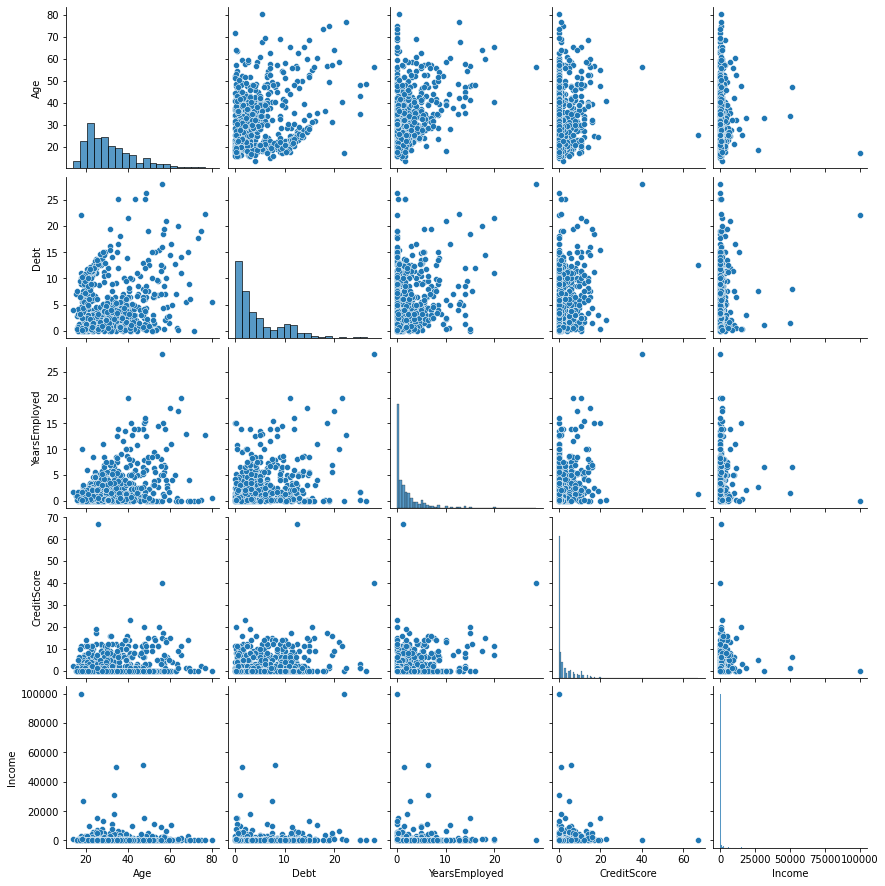

In [123]:
sns.pairplot(new_df)

# Modeling

In [124]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [125]:
# Separating dataset into features and target variables
y = new_df['Approved']
features = new_df.drop(['Approved'], axis=1)

features.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0


In [126]:
categorical = ['Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 
               'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']

In [127]:
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[categorical] = ordinal_encoder.fit_transform(features[categorical])

X.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1.0,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,68.0,0
1,0.0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,96.0,824
3,1.0,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


In [128]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = .30) 

In [129]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledXTrain = scaler.fit_transform(XTrain)
rescaledXTest = scaler.fit_transform(XTest)

logreg = LogisticRegression()

logreg.fit(rescaledXTrain, yTrain)

LogisticRegression()

In [143]:
# Classification Accuracy
from sklearn.metrics import confusion_matrix 

ypred = logreg.predict(rescaledXTest)
ypred1 = logreg.predict(rescaledXTrain)

print('Test: Accuracy = ', logreg.score(rescaledXTest,yTest))
print('Train: Accuracy = ', logreg.score(rescaledXTrain,yTrain))

confusion_matrix(yTest,ypred)

Test: Accuracy =  0.8309178743961353
Train: Accuracy =  0.8716356107660456


array([[86,  9],
       [26, 86]])